# Binary Classification of The U.S Airline Customers Tweets

**Dataset**: A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
[Source](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)

In [5]:
import pandas as pd
import os

data = pd.read_csv("tweets.csv")

In [6]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


## Remove Unnecessary Columns

In [17]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [18]:
to_drop = ['tweet_id',   'retweet_count',   'user_timezone',   'tweet_location',   'name',   'negativereason',   'airline_sentiment_confidence',   'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_created']

data.drop(to_drop, inplace=True, axis=1)

In [19]:
data.rename(columns={'airline_sentiment': 'label'}, inplace=True)

In [20]:
# drop rows that have 'neutral'
data = data[data['label'] != 'neutral']

In [21]:
data

,label,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
14633,negative,@AmericanAir my flight was Cancelled Flightled...
14634,negative,@AmericanAir right on cue with the delays👌
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...


In [22]:
# change labels from string to float 
label_map = {'positive': 1.0, 'negative': 0.0}
data['label'] = data['label'].map(label_map)

C:\Users\hussein\AppData\Local\Temp\ipykernel_9636\1370659487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map(label_map)


## Clean Text Entries

In [25]:
data['text'][1101]
data['text'][1000]
data['text'][30]
data['text'][10000]
# ===> text contains: links + annotations (user mention)

'@USAirways waiting all day at ATL since flight this am Cancelled Flightled. 1 standby told no seats and group of 15 shows up Late Flight and gets on to PHL'

In [26]:
import re
# Remove User Mention
usernames_regex =re.compile(r'@(?<=@)[^\s]+')
data['text'] = data['text'].str.replace(usernames_regex, '', regex=True)

# Remove Links
links_regex =re.compile(r'http(?<=http)[^\s]+')
data['text'] = data['text'].str.replace(links_regex, '', regex=True)

    
# Remove Punctuations
punc_regex = re.compile(r'[^a-zA-Z0-9\s]')
data['text'] = data['text'].str.replace(punc_regex, '', regex=True)

# Remove Single Characters
single_char_regex = re.compile(r'\s+[a-zA-Z]\s')
data['text'] = data['text'].str.replace(single_char_regex, ' ', regex=True)

# Remove Multiple Space
spaces_regex = re.compile(r'\s{2,}')
data['text'] = data['text'].str.replace(spaces_regex, ' ', regex=True)

C:\Users\hussein\AppData\Local\Temp\ipykernel_9636\3452811300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.replace(usernames_regex, '', regex=True)
C:\Users\hussein\AppData\Local\Temp\ipykernel_9636\3452811300.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.replace(links_regex, '', regex=True)
C:\Users\hussein\AppData\Local\Temp\ipykernel_9636\3452811300.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [27]:
data

,label,text
1,1.0,plus youve added commercials to the experienc...
3,0.0,its really aggressive to blast obnoxious ente...
4,0.0,and its really big bad thing about it
5,0.0,seriously would pay 30 flight for seats that ...
6,1.0,yes nearly every time fly VX this ear worm wo...
...,...,...
14633,0.0,my flight was Cancelled Flightled leaving tom...
14634,0.0,right on cue with the delays
14635,1.0,thank you we got on different flight to Chicago
14636,0.0,leaving over 20 minutes Late Flight No warnin...


In [28]:
# Remove Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hussein\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\hussein\AppData\Local\Temp\ipykernel_9636\328900670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [29]:
# Lower casing words
data['text'] = data['text'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))

C:\Users\hussein\AppData\Local\Temp\ipykernel_9636\1248122939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))


In [31]:
# Stemming Words
from nltk.stem.porter import * 
porter_stemmer = PorterStemmer() 
data['text'] = data['text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

C:\Users\hussein\AppData\Local\Temp\ipykernel_9636\966170768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))


# Train-Test Split

In [32]:
train_ds = data.sample(frac=0.8, random_state=1)
train = pd.DataFrame(data=train_ds)
test = data.drop(train_ds.index)

# Create the text Encoder

In [33]:
import tensorflow as tf

In [34]:
train = tf.data.Dataset.from_tensor_slices((train['text'], train['label']))
test = tf.data.Dataset.from_tensor_slices((test['text'], test['label']))

In [35]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train = train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test = test.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [36]:
test.element_spec

(TensorSpec(shape=(None,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [37]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train.map(lambda text, airline_sentiment: text))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [38]:
import numpy as np
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'flight', 'thank', 'get', 'hour', 'cancel', 'delay',
       'servic', 'custom', 'time', 'help', 'call', 'bag', 'wait', 'hold',
       'im', 'plane', '2', 'amp'], dtype='<U17')

# Create The Model

In [39]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [40]:
train.element_spec

(TensorSpec(shape=(None,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [41]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [42]:
history = model.fit(train, epochs=10,
                    validation_data=test,
                    validation_steps=30)

Epoch 1/10
145/145 [==============================] - 33s 119ms/step - loss: 0.5871 - accuracy: 0.7969 - val_loss: 0.4884 - val_accuracy: 0.7714
Epoch 2/10
145/145 [==============================] - 11s 77ms/step - loss: 0.4110 - accuracy: 0.7969 - val_loss: 0.4133 - val_accuracy: 0.7714
Epoch 3/10
145/145 [==============================] - 10s 70ms/step - loss: 0.3134 - accuracy: 0.8154 - val_loss: 0.3297 - val_accuracy: 0.8568
Epoch 4/10
145/145 [==============================] - 10s 66ms/step - loss: 0.2295 - accuracy: 0.9080 - val_loss: 0.2882 - val_accuracy: 0.8953
Epoch 5/10
145/145 [==============================] - 10s 70ms/step - loss: 0.1969 - accuracy: 0.9225 - val_loss: 0.2736 - val_accuracy: 0.8984
Epoch 6/10
145/145 [==============================] - 10s 67ms/step - loss: 0.1802 - accuracy: 0.9284 - val_loss: 0.2730 - val_accuracy: 0.8990
Epoch 7/10
145/145 [==============================] - 11s 77ms/step - loss: 0.1698 - accuracy: 0.9318 - val_loss: 0.2776 - val_accuracy

In [43]:
test_loss, test_acc = model.evaluate(test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

37/37 [==============================] - 1s 26ms/step - loss: 0.2718 - accuracy: 0.9038
Test Loss: 0.2717645466327667
Test Accuracy: 0.903812825679779


In [44]:
sample_text = ('nice flight'
               'amazing services')
predictions = model.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 4s 4s/step
[[0.9188306]]


In [45]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

(0.0, 0.6089923210442066)

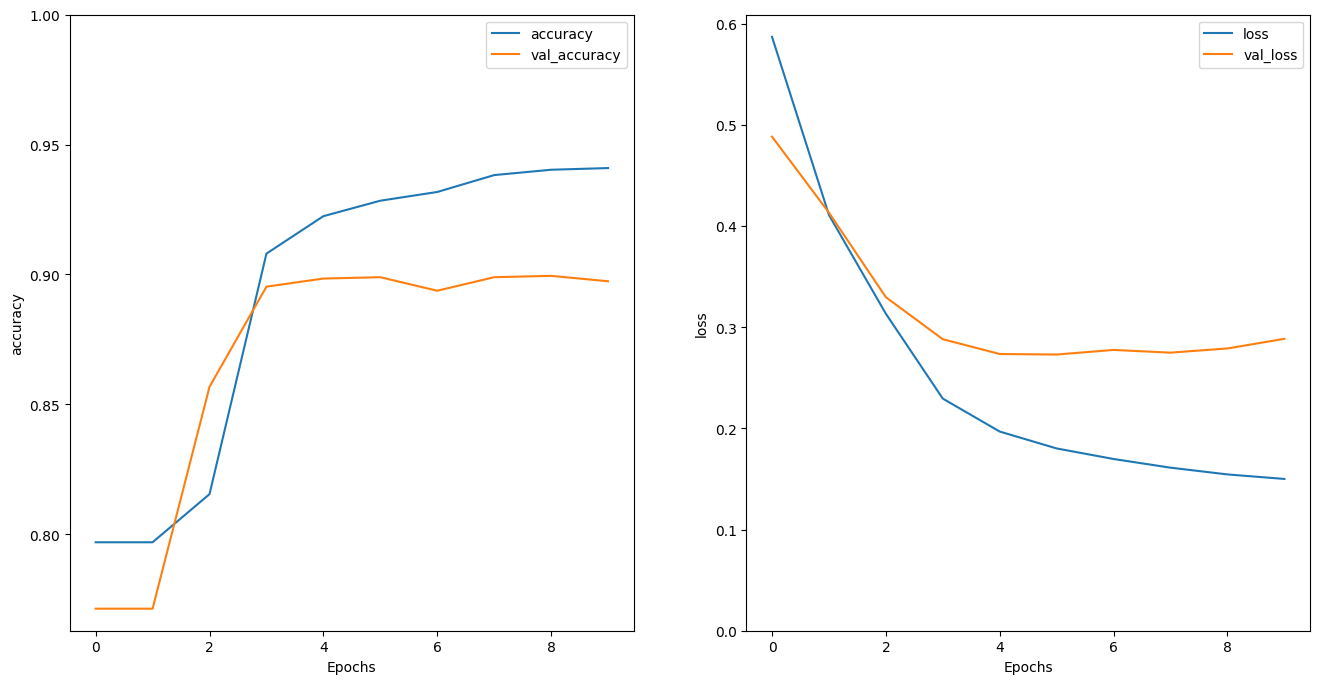

In [46]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)